In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Activation,Dense,SimpleRNN
from keras.utils import to_categorical,plot_model
from keras.datasets import mnist

In [4]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
print(xtrain.shape)

(60000, 28, 28)


In [5]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

In [7]:
image_size=xtrain.shape[1]
image_size

28

In [8]:
xtrain=xtrain.astype('float32')/255
xtest=xtest.astype('float32')/255
print(xtrain.shape)

(60000, 28, 28)


In [9]:
input_shape=(image_size,image_size)
batch_size=128
units=256
droupout=0.2

In [10]:
model=Sequential()
model.add(SimpleRNN(units=256,dropout=droupout,input_shape=input_shape))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

C:\Users\archa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 256)                 │          72,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,530 (295.04 KB)

 Trainable params: 75,530 (295.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.fit(xtrain,ytrain,epochs=10,batch_size=batch_size)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.7966 - loss: 0.6455
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9305 - loss: 0.2301
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9426 - loss: 0.1882
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9498 - loss: 0.1717
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9521 - loss: 0.1615
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9547 - loss: 0.1497
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9590 - loss: 0.1374
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9573 - loss: 0.1418
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9606 - loss: 0.1304
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9622 - loss: 0.1248


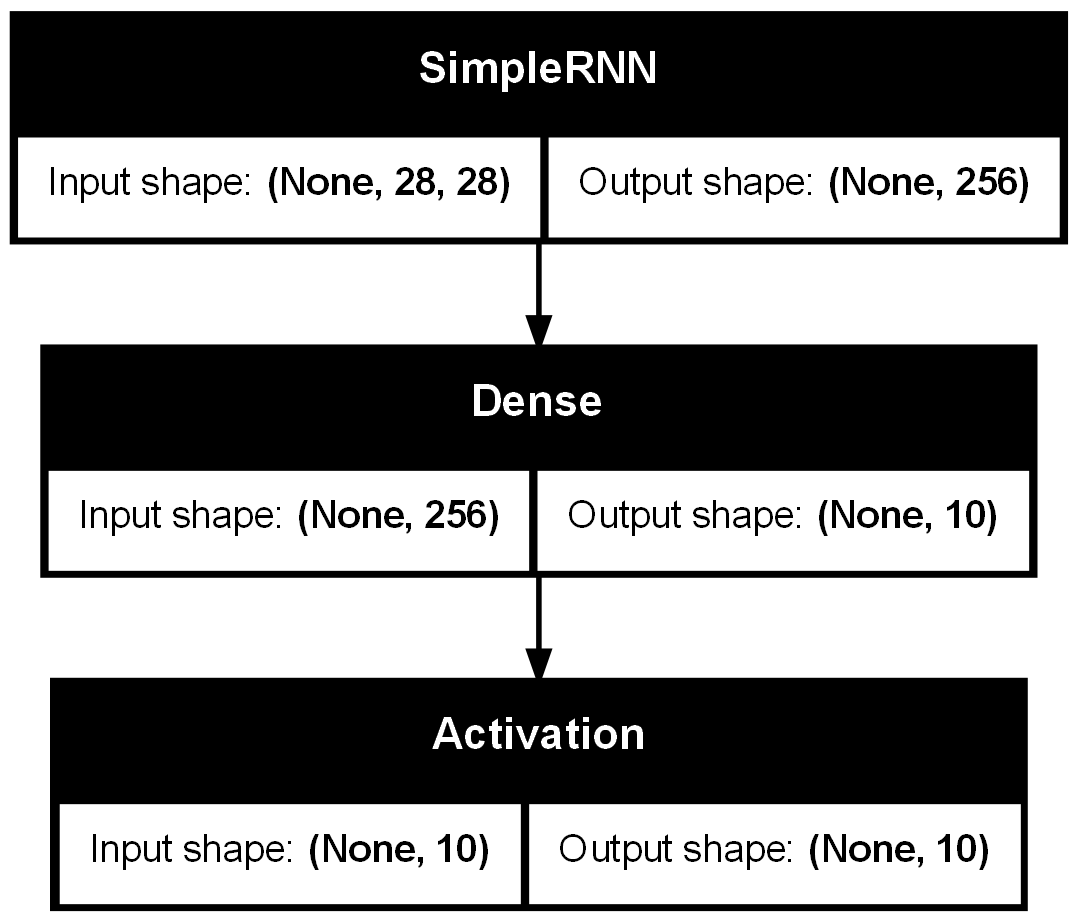

In [14]:
plot_model(model,to_file='rnn_mnist.png',show_shapes=True)